In [1]:
import pickle
import matplotlib.pyplot as plt

In [52]:
path = './log/history.pkl'

# history = None
# with open(path, 'rb') as file:
#     history = pickle.load(file)
    
    
# path = './log/history_woVR.pkl'
# history_woVR = None
# with open(path, 'rb') as file:
#     history_woVR = pickle.load(file)
    
    
path = './log/history_ac1.pkl'
history_ac1 = None
with open(path, 'rb') as file:
    history_ac1 = pickle.load(file)

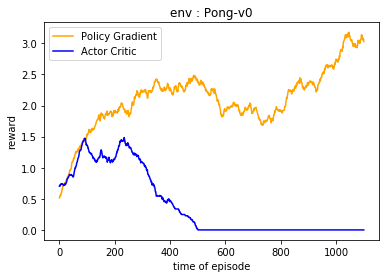

In [57]:
def smooth(history, width=15):
    len_ = history.__len__()
    start = [history[0]] * int(width/2)
    end = [history[-1]] * int(width/2)
    history = start + history + end
    new_history = [sum(history[idx:idx+width])/width + 21 for idx in range(len_)]
    return new_history


width = 101
new_history = smooth(history, width=width)[:history_ac1.__len__()]
new_history_woVR = smooth(history_woVR, width=width)
new_history_ac1 = smooth(history_ac1, width=width)

idx_list = [idx for idx in range(new_history.__len__())]
idx_list_woVR = [idx for idx in range(history_woVR.__len__())]
idx_list_ac1 = [idx for idx in range(history_ac1.__len__())]

fig = plt.figure()
plt.plot(idx_list, new_history, 'orange', label='Policy Gradient')
# plt.plot(idx_list_woVR, new_history_woVR, 'blue', label='PGbasic')
plt.plot(idx_list_ac1, new_history_ac1, 'blue', label='Actor Critic')

plt.title('env : Pong-v0')
plt.xlabel('time of episode')
plt.ylabel('reward')

plt.legend()
plt.savefig('./pg.png')
plt.show()